<a href="https://colab.research.google.com/github/Chuliyka/Artificial-Intelligence/blob/main/Task6_Unsupervised_Chulii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0**

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [ ]:
DataSet = pd.read_csv('Mall_Customers.csv')

DataSet = DataSet.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

print(DataSet)

     CustomerID  Gender  Age  Income  SpendingScore
0             1    Male   19      15             39
1             2    Male   21      15             81
2             3  Female   20      16              6
3             4  Female   23      16             77
4             5  Female   31      17             40
..          ...     ...  ...     ...            ...
195         196  Female   35     120             79
196         197  Female   45     126             28
197         198    Male   32     126             74
198         199    Male   32     137             18
199         200    Male   30     137             83

[200 rows x 5 columns]


**Завдання 1**

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка;
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [ ]:
print(DataSet.info())
print(DataSet.head())
print(DataSet.shape)
print(DataSet.describe())
print(DataSet.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40
(200, 5)
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min

## EDA Mall Customers

**Завдання 2**

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [ ]:
DataSet.drop(labels = ["CustomerID"],axis = 1,inplace = False)

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Завдання 3**

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

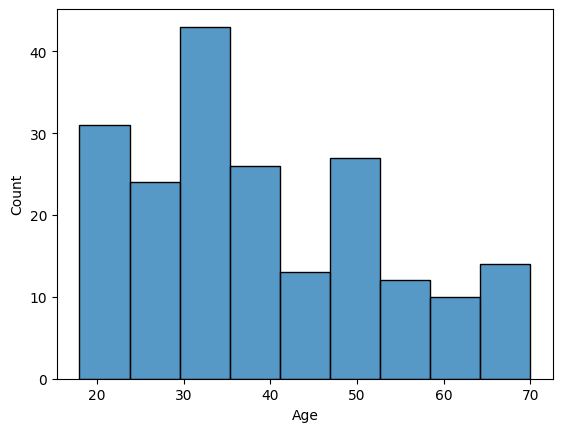

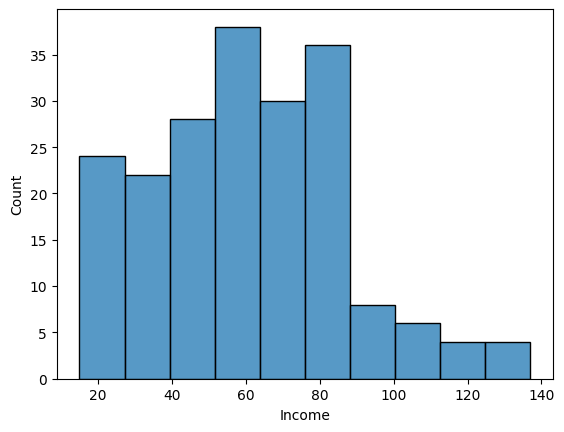

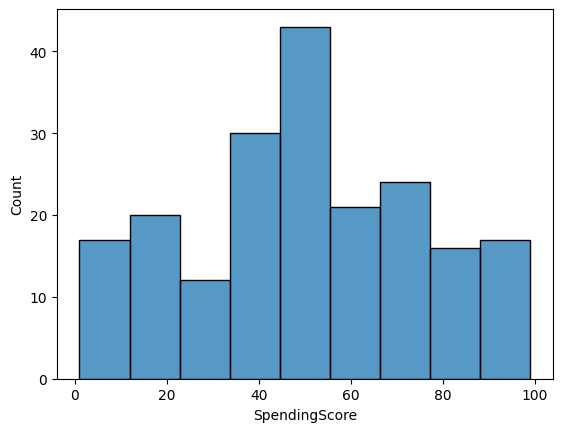

In [ ]:
sns.histplot(DataSet["Age"])
plt.show()
sns.histplot(DataSet["Income"])
plt.show()
sns.histplot(DataSet["SpendingScore"])
plt.show()

**Завдання 4**

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`.
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  

* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  


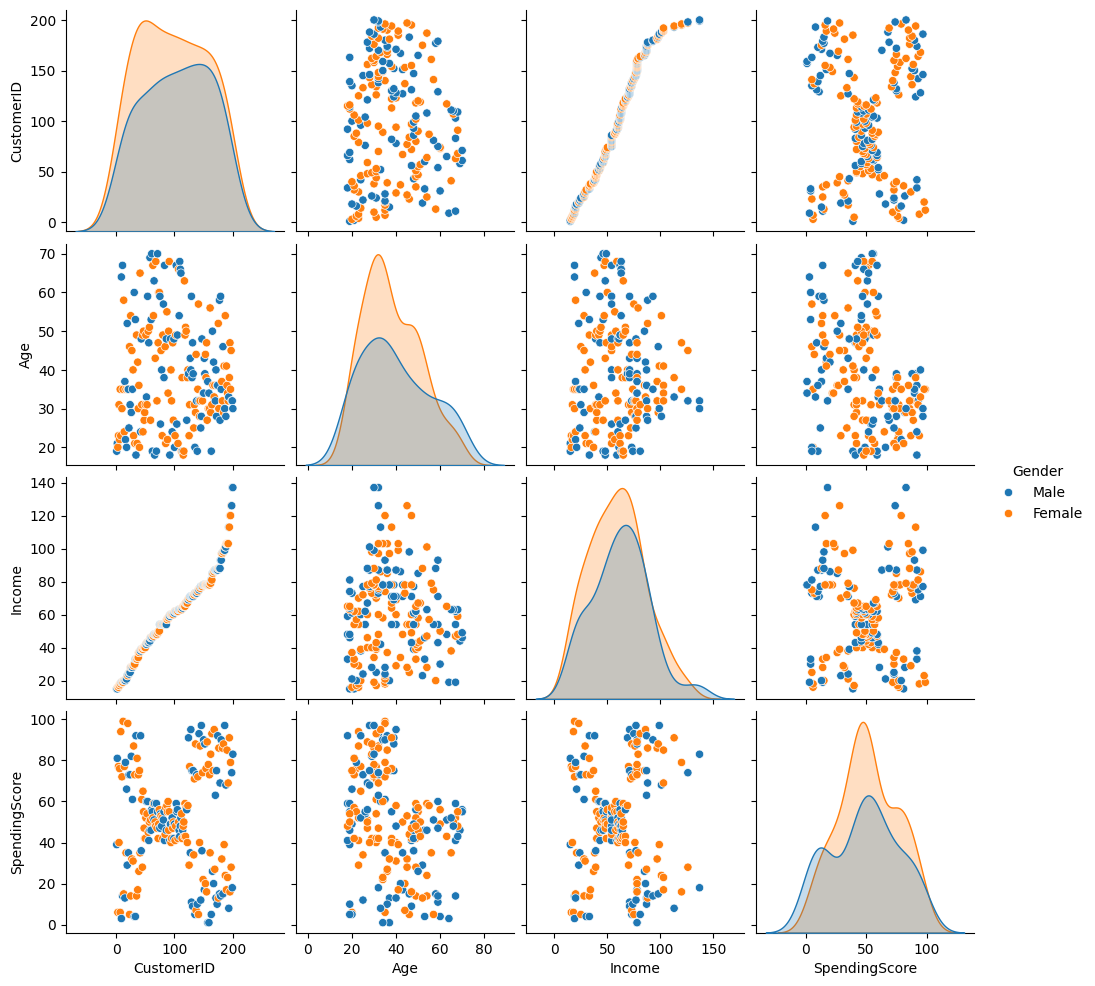

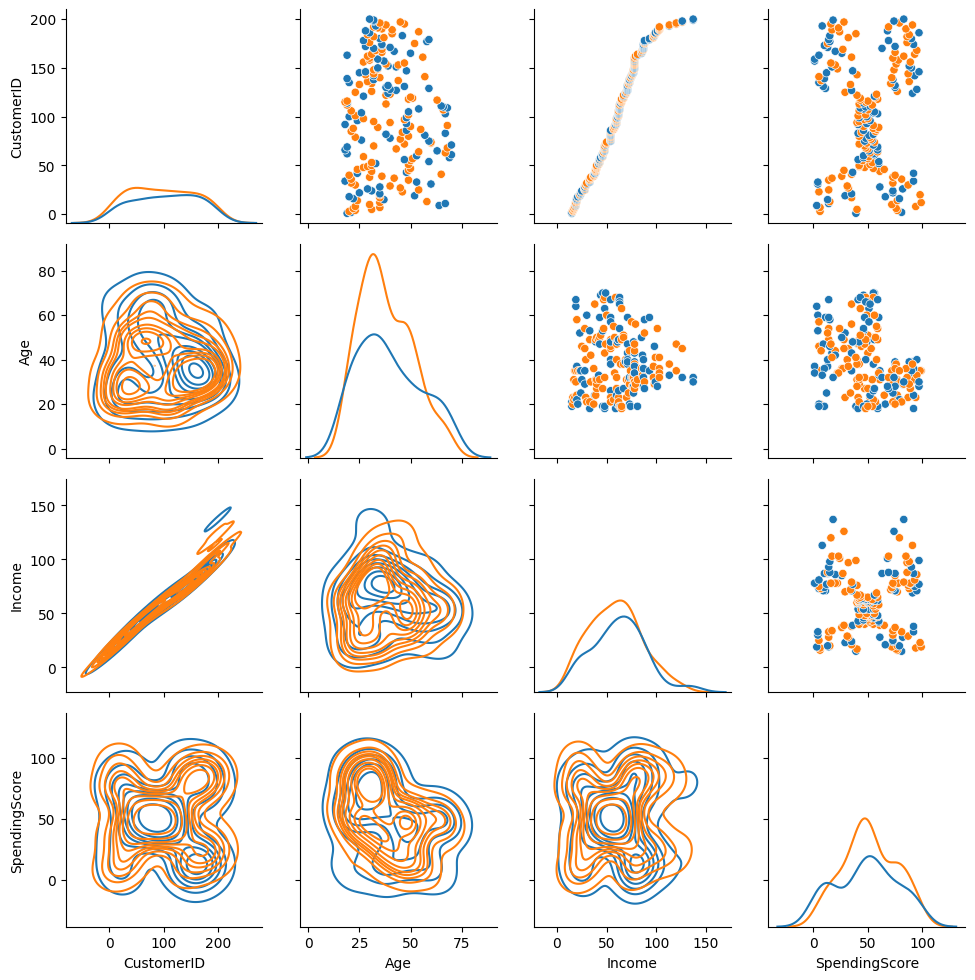

In [ ]:
sns.pairplot(DataSet, hue = 'Gender')
plt.show()

Grid = sns.PairGrid(DataSet,hue = 'Gender')
Grid.map_upper(sns.scatterplot)
Grid.map_diag(sns.kdeplot)
Grid.map_lower(sns.kdeplot, lw = 1)
plt.show()

**Висновки з 1-4 завдання (детальні)**

Розподіл змінної "Age" має симетричну форму, що дозволяє нам отримати уявлення про типовий вік клієнтів, зосереджений навколо певного середнього значення.

У змінної "Income" може бути асиметричний розподіл, що вказує на наявність різниці в доходах клієнтів. Це означає наявність груп з високим та низьким рівнем доходів.

Розподіл змінної "SpendingScore" може бути скошеним, що свідчить про те, що деякі клієнти витрачають більше, ніж інші, тоді як інші економлять.

Pairplot з урахуванням змінної "Gender" дозволяє візуалізувати залежності між різними змінними з огляду на стать клієнтів. Це допомагає оцінити розподіли змінних для чоловіків та жінок.

**Завдання 5**

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    112
Male       88
Name: count, dtype: int64


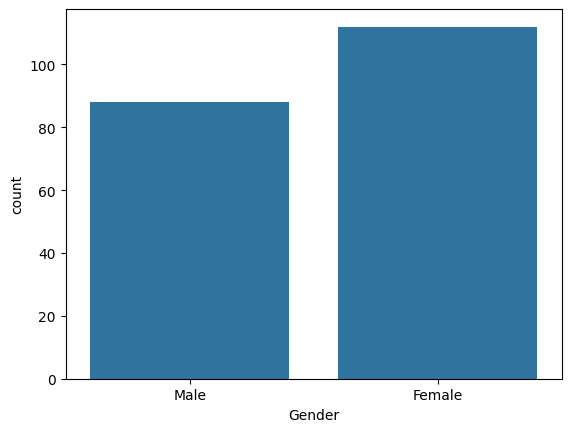

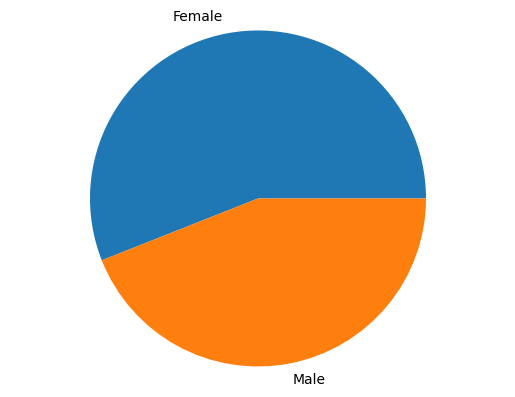

In [ ]:
print(DataSet['Gender'].value_counts())

sns.countplot(x = 'Gender', data = DataSet)
plt.show()

GenderCounts = DataSet['Gender'].value_counts()
plt.pie(GenderCounts, labels = GenderCounts.index)
plt.axis('equal')
plt.show()

**Завдання 6**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

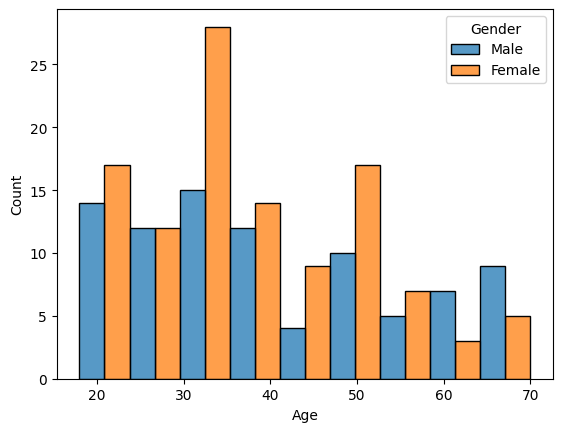

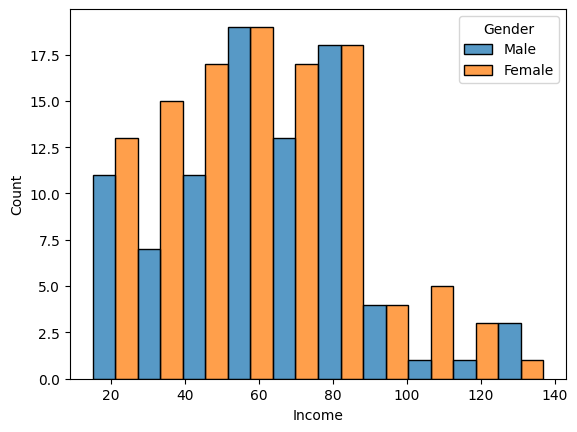

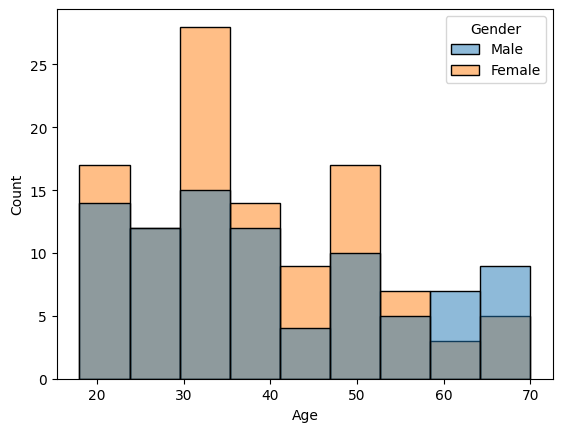

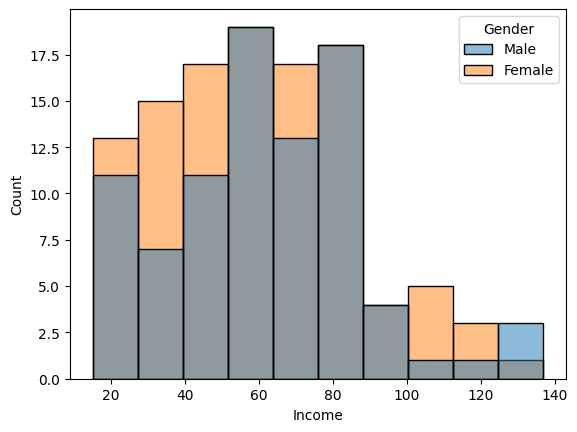

In [ ]:
sns.histplot(data = DataSet, x = 'Age', hue = 'Gender', multiple = 'dodge')
plt.show()

sns.histplot(data = DataSet, x = 'Income', hue = 'Gender', multiple = 'dodge')
plt.show()

sns.histplot(data=DataSet, x='Age', hue='Gender', multiple='layer')
plt.show()

sns.histplot(data=DataSet, x='Income', hue='Gender', multiple='layer')
plt.show()

**Завдання 7**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.



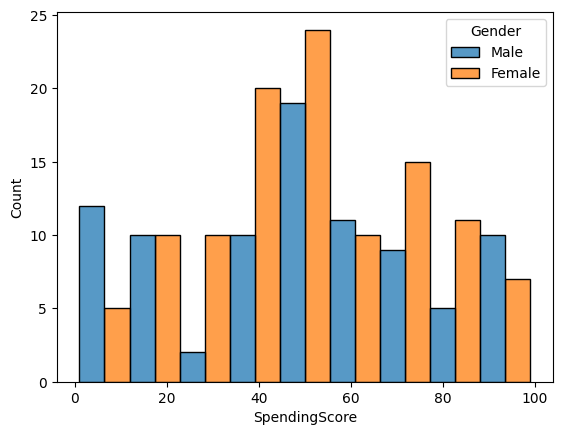

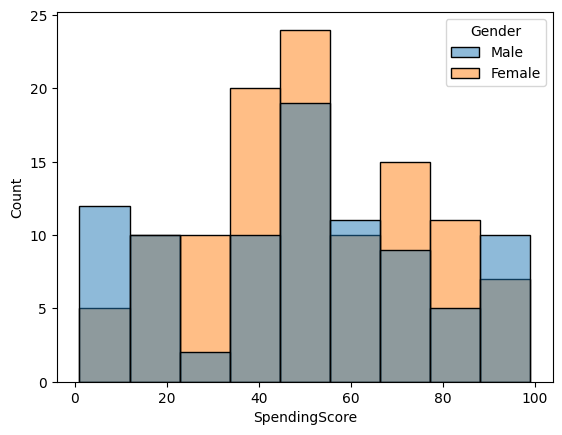

In [ ]:
sns.histplot(data=DataSet, x='SpendingScore', hue='Gender', multiple='dodge')
plt.show()

sns.histplot(data=DataSet, x='SpendingScore', hue='Gender', multiple='layer')
plt.show()

**Завдання 8**

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`.

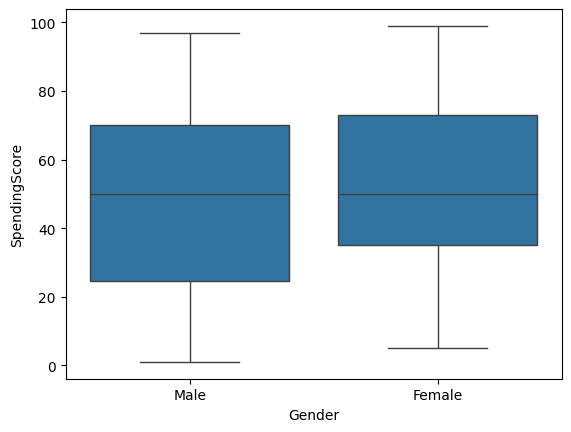

In [ ]:
sns.boxplot(data=DataSet, x='Gender', y='SpendingScore')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини?
3. Чи є різниця між витратами у чоловіків та жінок?


### **Висновок**

За графіками помітно, що у датасеті більше жінок, ніж чоловіків, проте різниця становить лише 6%.

За атрибутом "Age" можна поділити дані на три вікові категорії: до 40 років, від 40 до 60 років і понад 60 років. При розгляді графіків у цих вікових групах,спостерігається наступне:

 У віковій групі до 40 років чоловіки і жінки витрачають приблизно однакові суми.
 У віковій групі від 40 до 60 років, як і раніше, чоловіки і жінки витрачають близько однакову суму, проте жінки витрачають більше.
 У віковій групі понад 60 років тенденція залишається схожою, але жінки витрачають значно більше, як підтверджує аналіз за допомогою KDE.

Отже, різниця у витратах поміж статями спостерігається, особливо серед осіб старше 60 років, де жінки витрачають більше, ніж чоловіки.

## K-means Method ##

**Завдання 9**

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

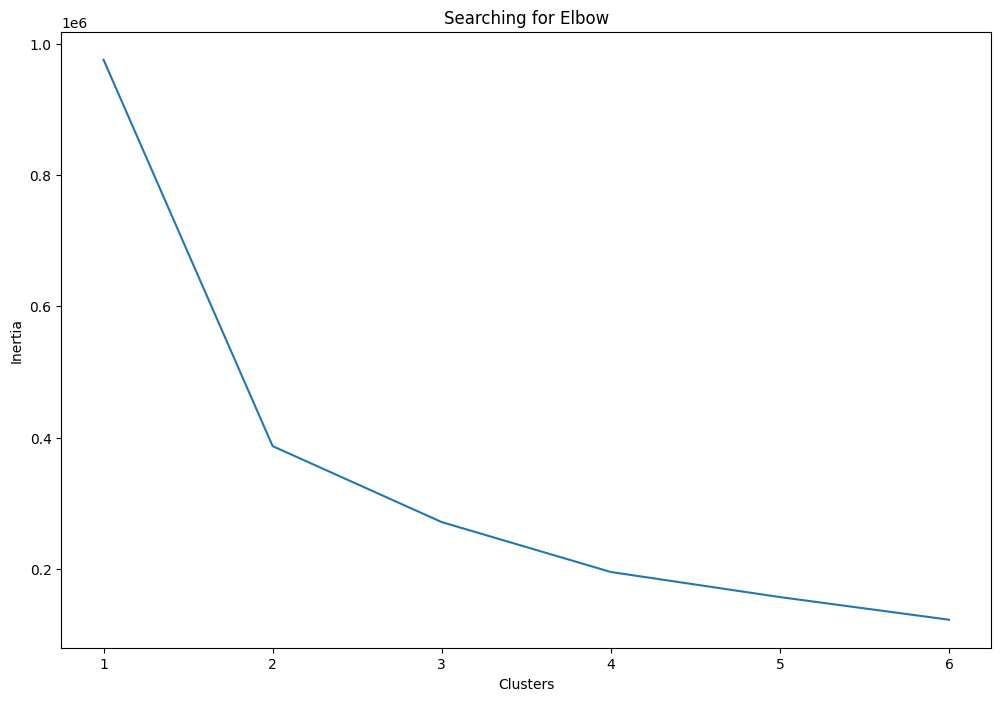

In [ ]:
x = DataSet.drop(['Gender'], axis=1)
clusters = []

Search={}
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k).fit(x)
    x["clusters"] = kmeans.labels_
    Search[k] = kmeans.inertia_

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(Search.keys()), y=list(Search.values()), ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)**

1.  Видалити змінну `Gender`, тому що  KMeans - це алгоритм, заснований на відстані, який працює добре з числовими даними. **Чому?**;  
2.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)



З огляду на отримані раніше результати та аналіз методом Elbow, я вирішила не змінювати кількість кластерів і розглянула гіпотези для двох можливих кількостей кластерів: 3 та 5.
> Добавить блок с цитатой









**Завдання 10**

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`.

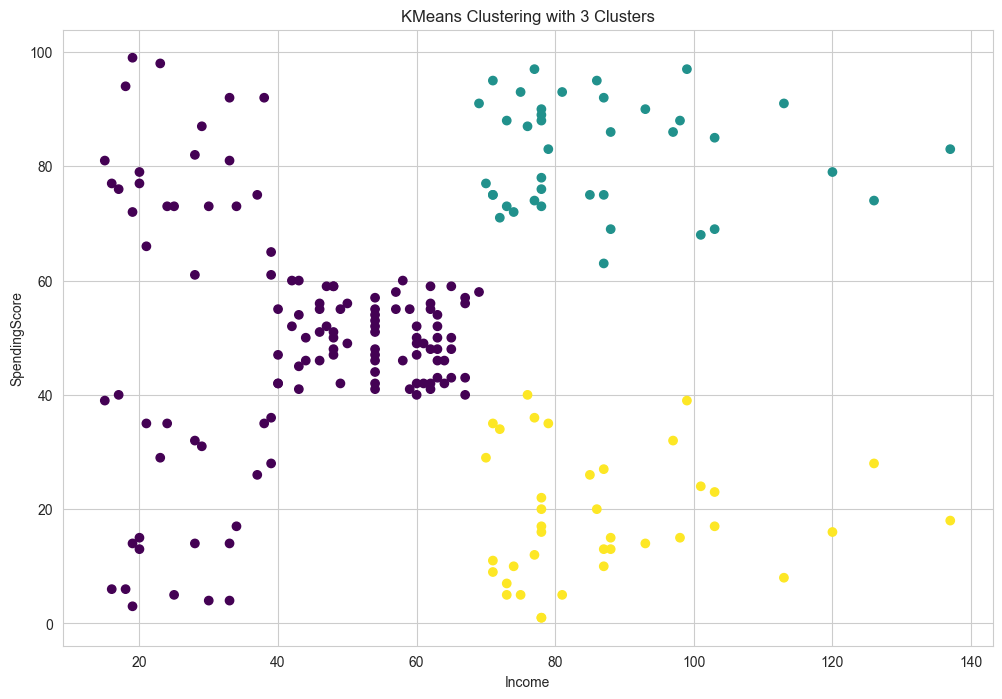

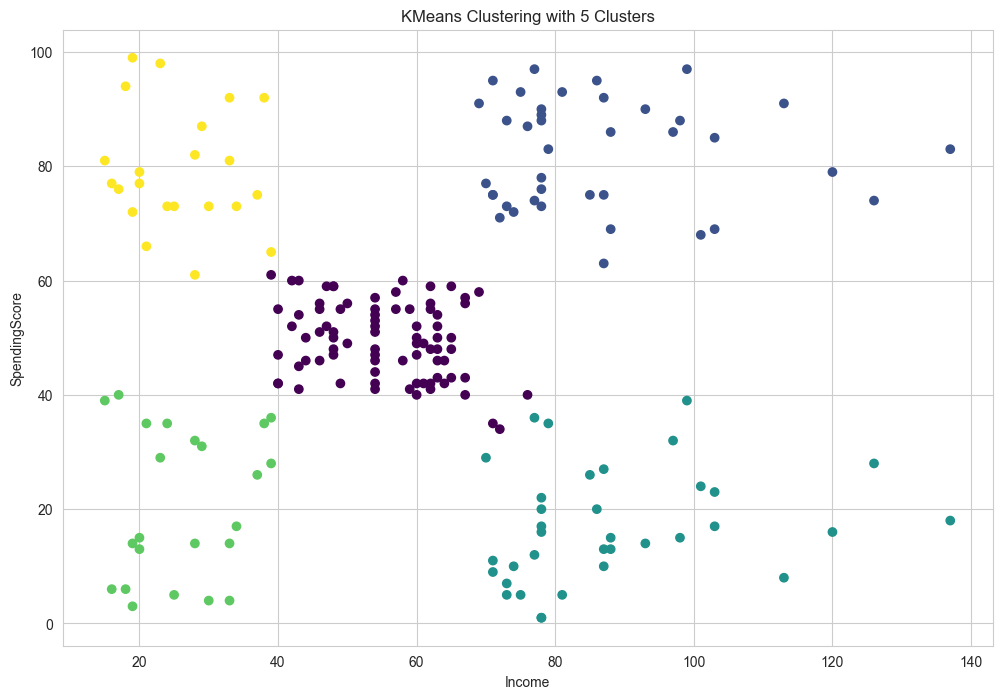

In [ ]:
X = DataSet[['Income', 'SpendingScore']]

n_clusters_1 = 3
kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=0).fit(X)
n_clusters_2 = 5
kmeans_2 = KMeans(n_clusters=n_clusters_2, random_state=0).fit(X)

plt.figure(figsize=(12, 8))
plt.scatter(X['Income'], X['SpendingScore'], c=kmeans_1.labels_, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.title('KMeans Clustering with 3 Clusters')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(X['Income'], X['SpendingScore'], c=kmeans_2.labels_, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.title('KMeans Clustering with 5 Clusters')
plt.show()

**Завдання 11**

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [ ]:
X = DataSet[['Income', 'Age', 'SpendingScore']]

n_clusters_1 = 3
kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=0).fit(X)
n_clusters_2 = 5
kmeans_2 = KMeans(n_clusters=n_clusters_2, random_state=0).fit(X)

fig = px.scatter_3d(X,x=X['Income'], y=X['Age'], z=X['SpendingScore'], color=kmeans_1.labels_)
fig.update_layout(title='KMeans Clustering with 3 Clusters',  width=800, height=600)
fig.show()

fig = px.scatter_3d(X,x=X['Income'], y=X['Age'], z=X['SpendingScore'], color=kmeans_2.labels_)
fig.update_layout(title='KMeans Clustering with 5 Clusters',  width=800, height=600)
fig.show()

**Висновки з завдання 10 - 11 (детальні)**

З огляду на отримані візуалізації, я вважаю, що оптимальною кількістю кластерів є 5. Після аналізу з використанням методу K-Means, найбільш оптимальною кількістю кластерів виявилась кількість 5.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12**

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


**Висновки з завдання 12 (детальні)**

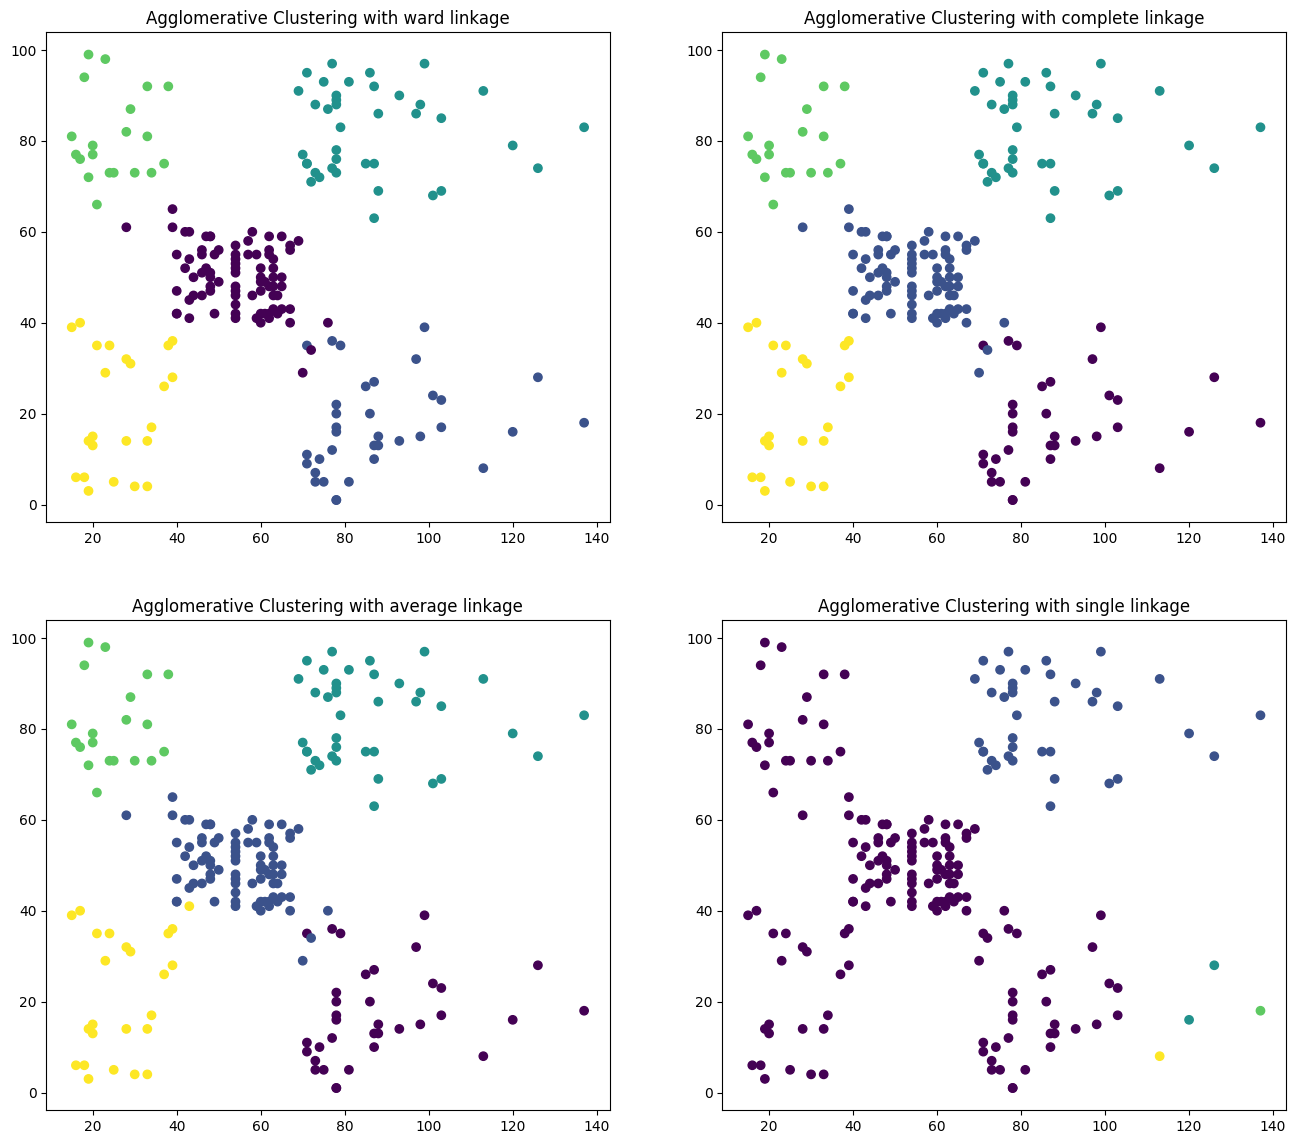

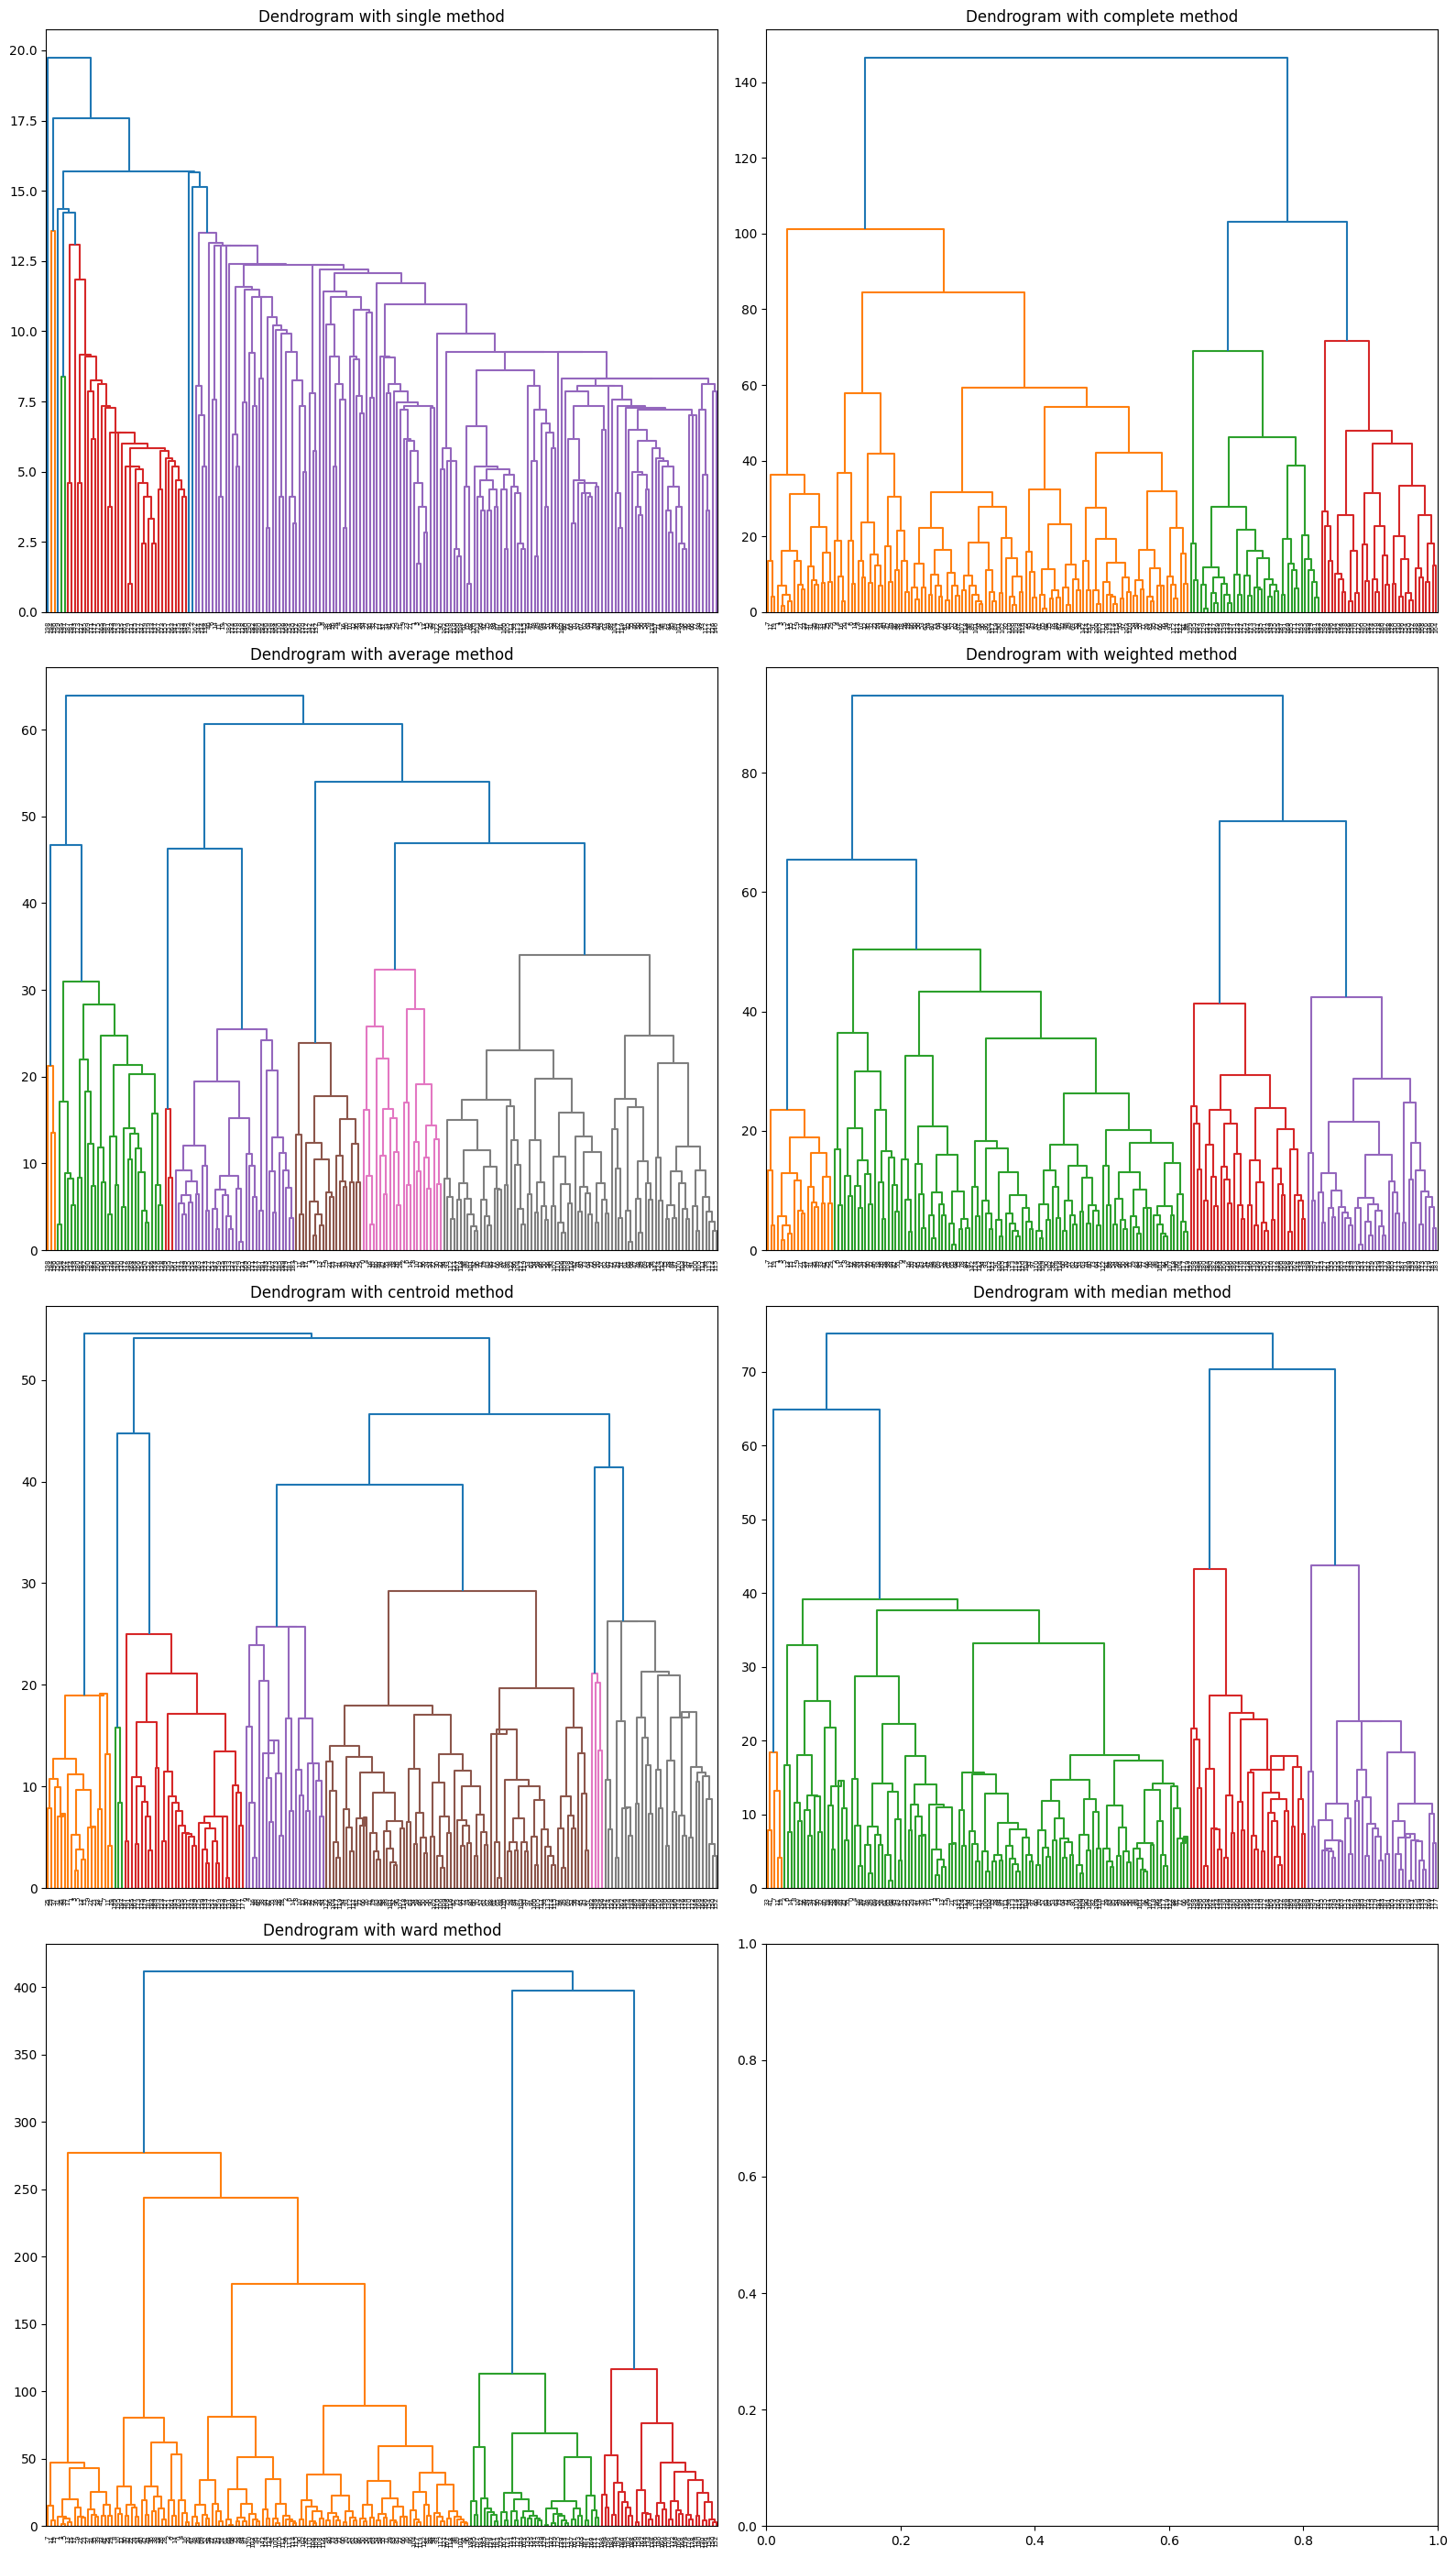

In [ ]:
links = ['ward', 'complete', 'average', 'single']
fig, axs = plt.subplots(2, 2, figsize=(16, 14))

for i, linkage in enumerate(links):
    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage).fit(X)


    ax = axs[i//2, i%2]
    ax.scatter(X['Income'], X['SpendingScore'], c=clustering.labels_, cmap='viridis')
    ax.set_title(f'Agglomerative Clustering with {linkage} linkage')
plt.show()

methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
fig, axs = plt.subplots(4, 2, figsize=(16, 28))

dist = hierarchy.distance.pdist(X, 'euclidean')

for i, method in enumerate(methods):
    Z = hierarchy.linkage(dist, method=method)

    ax = axs[i//2, i%2]
    hierarchy.dendrogram(Z, ax=ax, orientation='top')
    ax.set_title(f'Dendrogram with {method} method')

plt.tight_layout()
plt.show()

Шляхом застосування різних методів та алгоритмів обчислення відстані ми прийшли до висновку, що найоптимальнішою кількістю кластерів є 5. Отже, ми вирішили використовувати саме цю кількість кластерів.

**Завдання 13**

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

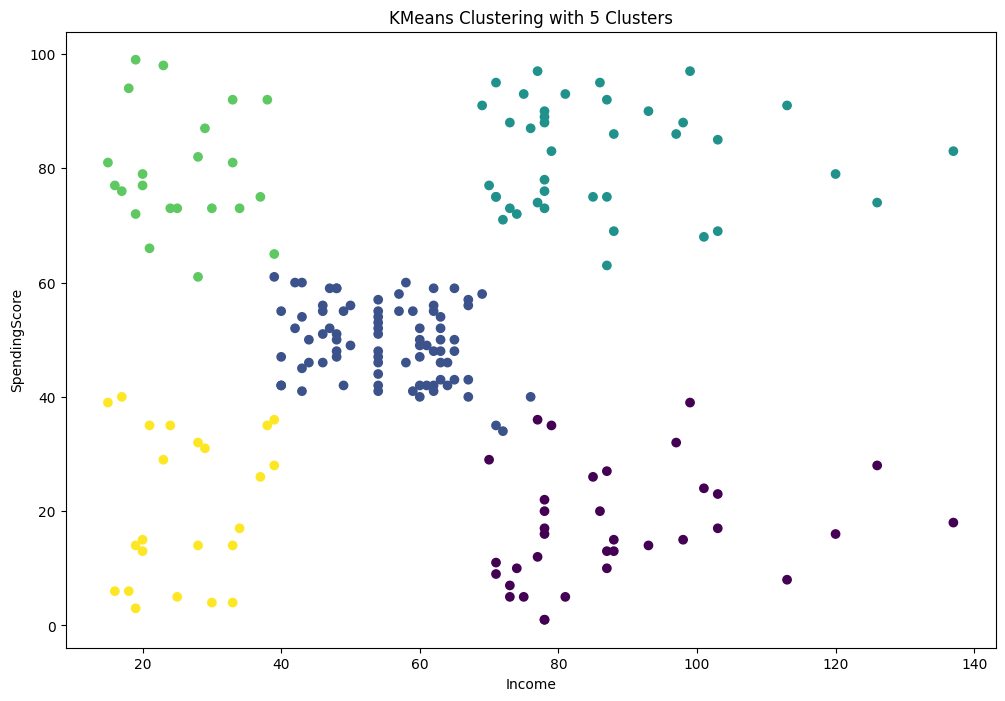

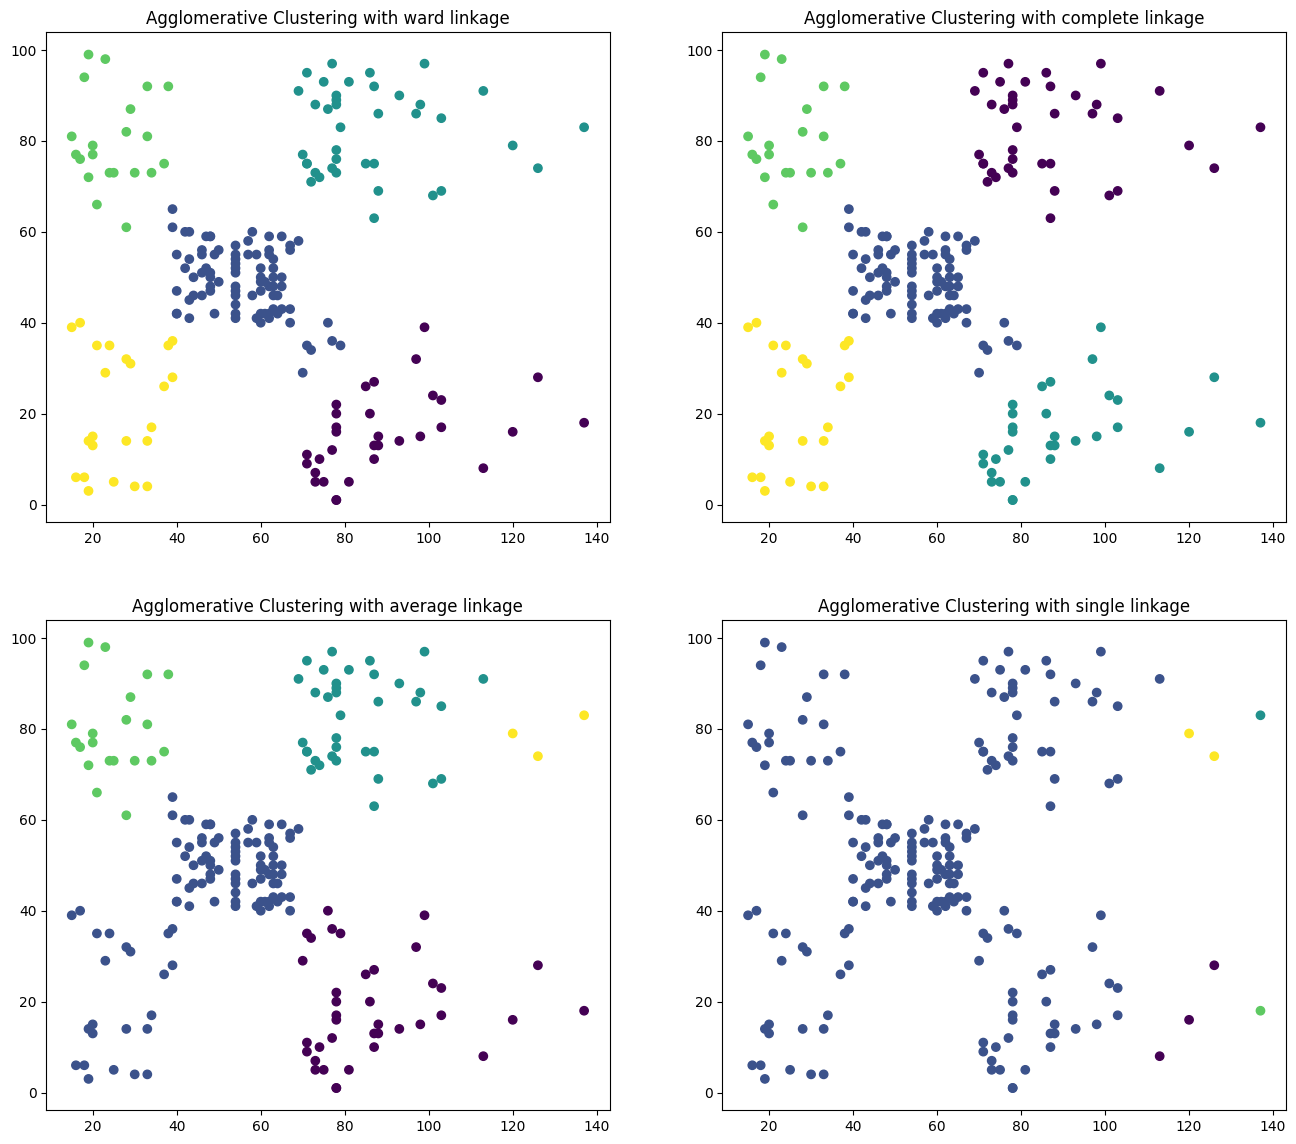

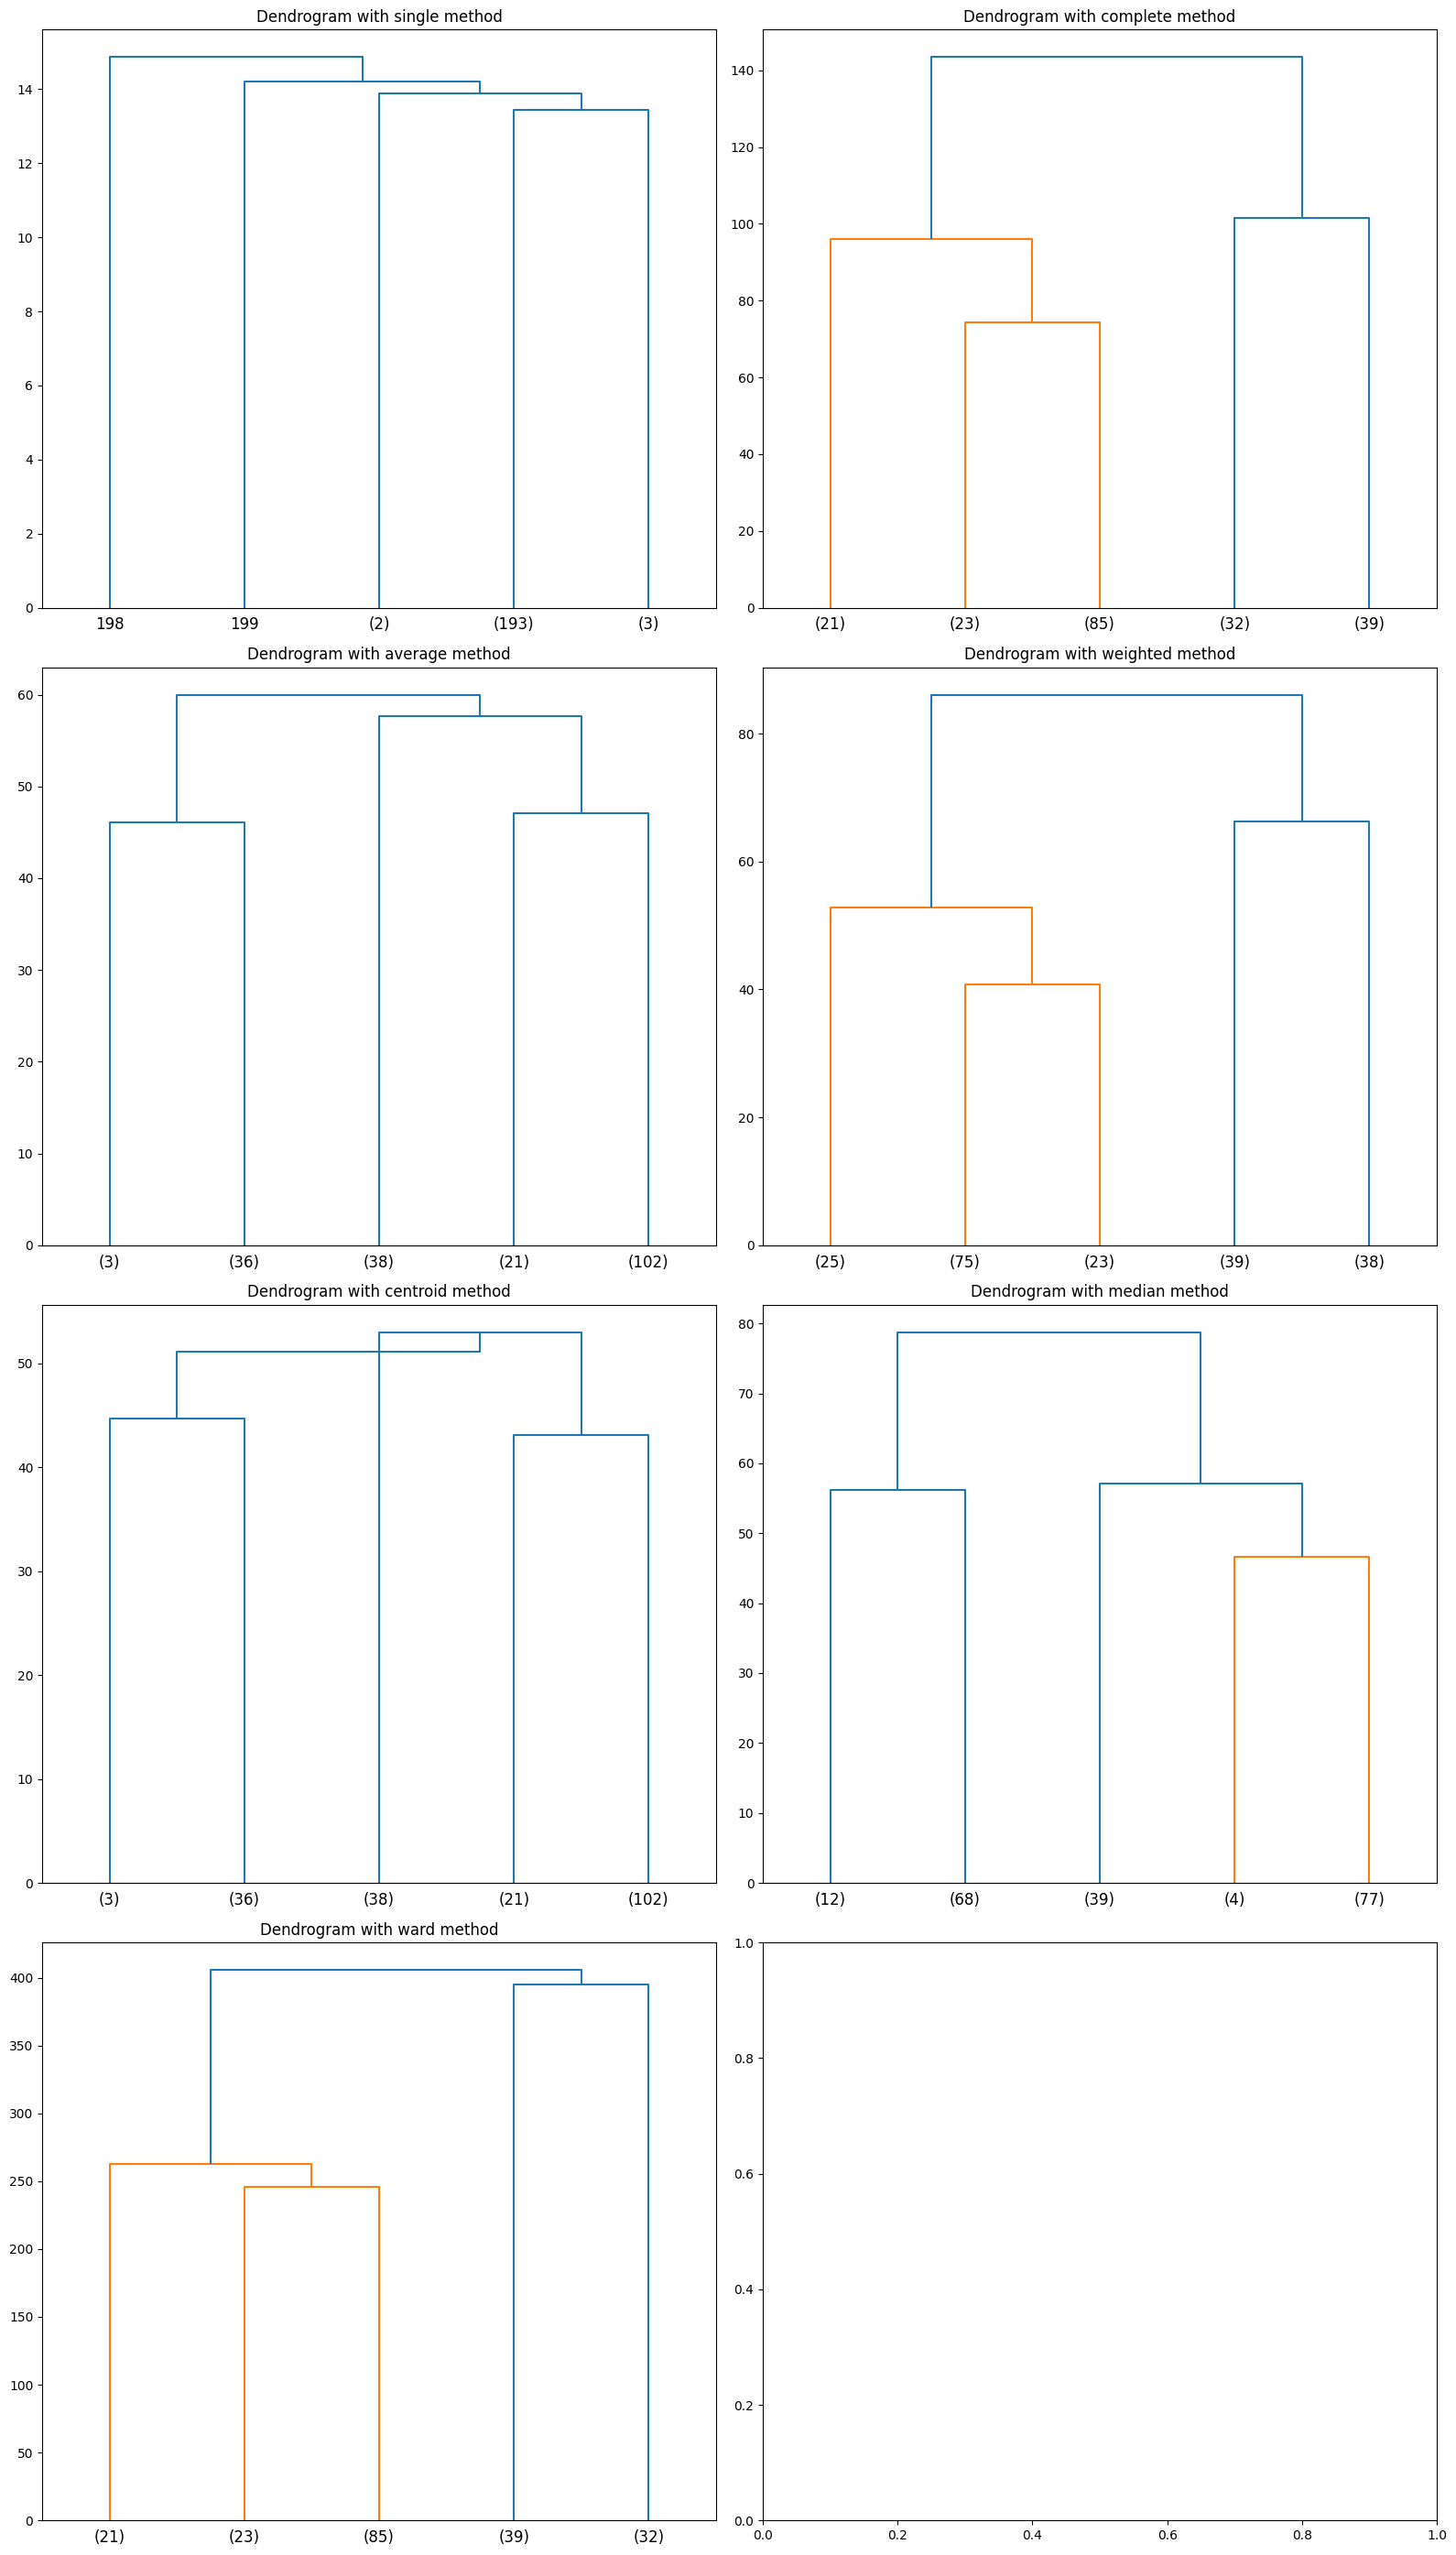

In [ ]:
X = DataSet[['Income', 'SpendingScore']]

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
plt.figure(figsize=(12, 8))
plt.scatter(X['Income'], X['SpendingScore'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.title('KMeans Clustering with 5 Clusters')
plt.show()



linkages = ['ward', 'complete', 'average', 'single']
fig, axs = plt.subplots(2, 2, figsize=(16, 14))

for i, linkage in enumerate(linkages):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit(X)

    ax = axs[i//2, i%2]
    ax.scatter(X['Income'], X['SpendingScore'], c=clustering.labels_, cmap='viridis')
    ax.set_title(f'Agglomerative Clustering with {linkage} linkage')

plt.show()


methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
fig, axs = plt.subplots(4, 2, figsize=(16, 28))


dist = hierarchy.distance.pdist(X, 'euclidean')

for i, method in enumerate(methods):
    Z = hierarchy.linkage(dist, method=method)

    ax = axs[i//2, i%2]
    hierarchy.dendrogram(Z, ax=ax, truncate_mode='lastp', p=n_clusters)
    ax.set_title(f'Dendrogram with {method} method')


plt.tight_layout()
plt.show()


**Висновки з завдання 13 (детальні)**

Метод кластеризації KMeans використовує ітеративний підхід для зменшення внутрішньокластерної варіативності. За візуалізацією видно, що модель KMeans з 5 кластерами добре розділяє дані, особливо високі значення SpendingScore.
Метод кластеризації Agglomerative використовує ієрархічний підхід, розпочинаючи з кожного спостереження як окремого кластера та поступово об'єднуючи їх. Різні методи зв'язку, такі як ward, complete, average, single, можуть призводити до різних результатів кластеризації. Наприклад, метод ward зазвичай створює кластери однакового розміру, тоді як complete та average можуть створювати кластери різного розміру.
Дендрограми дозволяють візуалізувати процес ієрархічної кластеризації та допомагають визначити оптимальну кількість кластерів. З дендрограм можна бачити, як різні спостереження або групи спостережень об'єднуються на кожному кроці кластеризації.